0. Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

1. Carregando o conjunto de dados

In [2]:
#Carregando o conjunto de dados
df = pd.read_csv('../data/raw/Churn_Modelling.csv')

#Exibindo informações básicas e as primeiras linhas
df.info() 
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  str    
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  str    
 5   Gender           10000 non-null  str    
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), str(3)
memory usage: 1.1 MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


2. Pré-processamento de dados

In [3]:
# Verificando quantidade de valores nulos
df.isnull().mean() * 100


RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

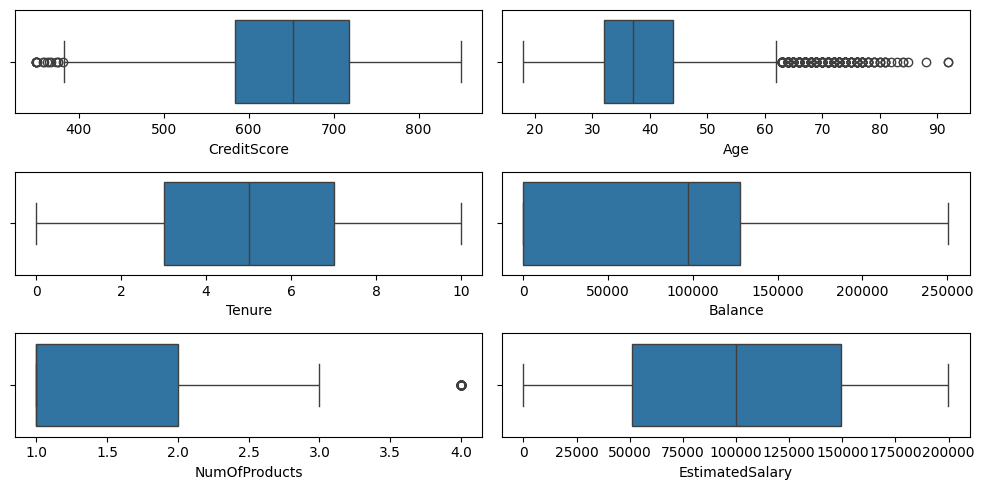

In [4]:
#Identificando possíveis outliers
#Definindo o tamanho da figura (largura, altura)
plt.figure(figsize=(10, 5))

#Plotando boxplot
cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
for i in range(6):
    #Criando uma grade de 2 linhas e 2 colunas
    plt.subplot(3, 2, i+1)
    #Criando boxplot
    sns.boxplot(data=df, x=cols[i])

#Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()

In [5]:
#Explorando as estatísticas básicas das colunas numéricas no conjunto de dados
df.iloc[:, 3:14].describe() #Selecionando todas as linhas e obtendo descrição dos dados das colunas


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


3. Mineração de dados 

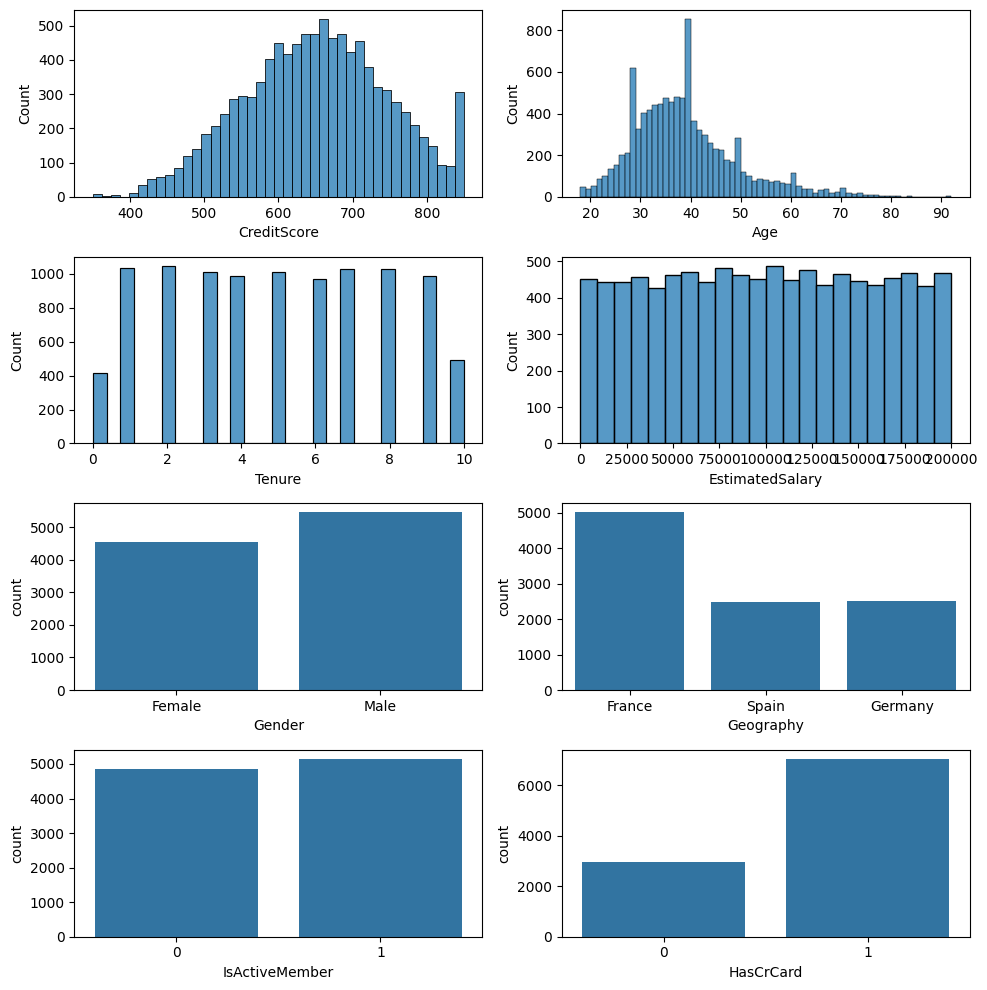

In [6]:
#Análise Univariada
#Definindo o tamanho da figura (largura, altura)
plt.figure(figsize=(10, 10))

#Plotando histograma e gráfico de barras para colunas-chave
cols = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'Gender', 'Geography', 'IsActiveMember', 'HasCrCard']
for i, col in enumerate(cols):
    #Criando uma grade de 2 linhas e 2 colunas
    plt.subplot(4, 2, i+1)
    if i<4:
        sns.histplot(data=df, x=col)
    else:
        sns.countplot(data=df, x=col)

#Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()

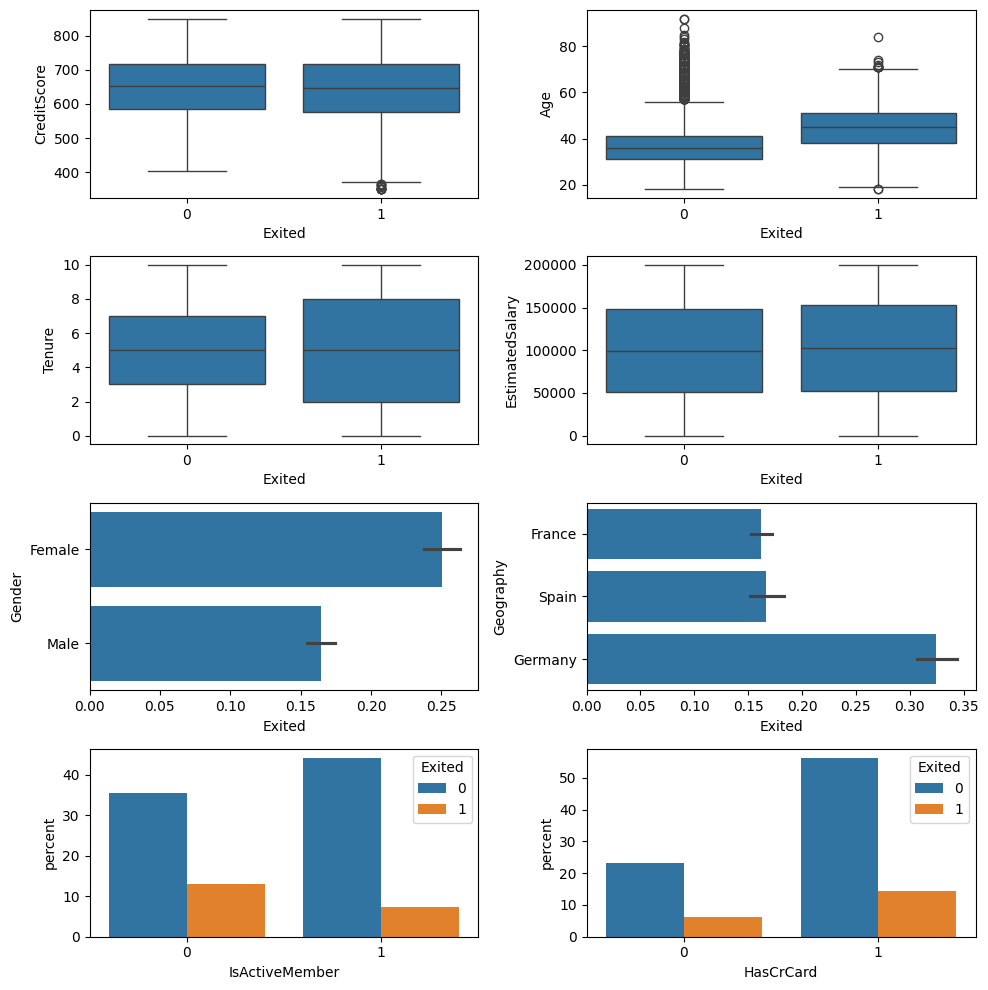

In [10]:
#Análise bivariada
#Definindo o tamanho da figura (largura, altura)
plt.figure(figsize=(10, 10))

#Plotando  e  para colunas-chave
cols = ['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'Gender', 'Geography', 'IsActiveMember', 'HasCrCard']
for i in range(8):
    #Criando uma grade de 2 linhas e 2 colunas
    plt.subplot(4, 2, i+1)
    if i<=3:
        sns.boxplot(x='Exited', y=cols[i], data=df)
    elif i>=4 and i<=5: 
        sns.barplot(x='Exited', y=cols[i], data=df)
    else:
        sns.countplot(x=cols[i], hue='Exited', data=df, stat='percent')

#Ajustando o espaçamento para os títulos não baterem nos eixos
plt.tight_layout()